In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_absolute_error, mean_squared_error, r2_score,precision_score,recall_score,f1_score





In [43]:
df= pd.read_csv('heart_disease.csv')
df



# age: Age of the individual
# sex: Gender of the individual (0 = female, 1 = male)
# chest pain type: Type of chest pain (4 categories: 0-3)
# resting blood pressure: Resting blood pressure (in mm Hg)
# serum cholesterol: Cholesterol level (in mg/dl)
# fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
# resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
# maximum heart rate achieved
# exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: The slope of the peak exercise ST segment (0-2)
# number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
# thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target: Presence of heart disease (1 = Yes, 0 = No)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# splitting data into numerical and categorical data

num_df=df[['age','trestbps','chol','thalach','oldpeak']]
cat_df=df[['sex','cp','fbs','restecg','exang','slope','ca','thal']]
target=df[['target']]

In [7]:

def replace_outliers(df,col_name):
    q1= df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    up_bound= q3 + 1.5*iqr
    low_bound= q1 - 1.5* iqr

    outliers = df[(df[col_name] < low_bound) | (df[col_name] > up_bound)]
    num_df[col_name].clip(upper=up_bound,inplace=True)
    num_df[col_name].clip(lower=low_bound,inplace=True)
    #print(f"\n{col_name}\n",outliers[col_name])
    return df[col_name]

for col in num_df.columns:
    num_df[col]=replace_outliers(num_df,col)

C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_20184\1565665623.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df[col_name].clip(upper=up_bound,inplace=True)
C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_20184\1565665623.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col_name].clip(upper=up_bound,inplace=True)
C:\

In [9]:
print(num_df.sort_values(by='age'))
print(num_df.sort_values(by='trestbps'))
print(num_df.sort_values(by='chol'))
print(num_df.sort_values(by='thalach'))
print(num_df.sort_values(by='oldpeak'))

     age  trestbps  chol  thalach  oldpeak
60    29       130   204      202      0.0
118   29       130   204      202      0.0
668   29       130   204      202      0.0
64    29       130   204      202      0.0
572   34       118   182      174      0.0
..   ...       ...   ...      ...      ...
99    76       140   197      116      1.1
965   76       140   197      116      1.1
160   77       125   304      162      0.0
162   77       125   304      162      0.0
387   77       125   304      162      0.0

[1025 rows x 5 columns]
     age  trestbps  chol  thalach  oldpeak
223   39        94   199      179      0.0
301   51        94   227      154      0.0
732   51        94   227      154      0.0
704   51        94   227      154      0.0
558   39        94   199      179      0.0
..   ...       ...   ...      ...      ...
681   59       170   326      140      3.4
688   56       170   288      133      4.0
47    66       170   228      165      1.0
971   52       170   199     

In [11]:
# clipping 0 becuz its a minority and an anomaly

cat_df.loc[cat_df['thal'] == 0, 'thal'] = 1
print(len(cat_df[cat_df['thal']==3]))
print(len(cat_df[cat_df['thal']==2]))
print(len(cat_df[cat_df['thal']==1]))
print(len(cat_df[cat_df['thal']==0]))

410
544
71
0


C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_20184\421279980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.loc[cat_df['thal'] == 0, 'thal'] = 1


In [13]:
#SCALING

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_num_df=num_df.copy()
scaled_num_df[['age','trestbps','chol','thalach','oldpeak']]= scaler.fit_transform(num_df[['age','trestbps','chol','thalach','oldpeak']])

In [15]:
final_df=pd.concat([num_df['age'],scaled_num_df.drop(['age'],axis=1),cat_df],axis=1)
final_df



,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,52,0.407895,0.351020,0.719008,0.222222,1,0,0,1,0,2,2,3
1,53,0.605263,0.314286,0.611570,0.688889,1,0,1,0,1,0,0,3
2,70,0.671053,0.195918,0.363636,0.577778,1,0,0,1,1,0,0,3
3,61,0.710526,0.314286,0.661157,0.000000,1,0,0,1,0,2,1,3
4,62,0.578947,0.685714,0.206612,0.422222,0,0,1,1,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,0.605263,0.387755,0.685950,0.000000,1,1,0,1,1,2,0,2
1021,60,0.407895,0.538776,0.495868,0.622222,1,0,0,0,1,1,1,3
1022,47,0.210526,0.608163,0.305785,0.222222,1,0,0,0,1,1,1,2
1023,50,0.210526,0.522449,0.644628,0.000000,0,0,0,0,0,2,0,2


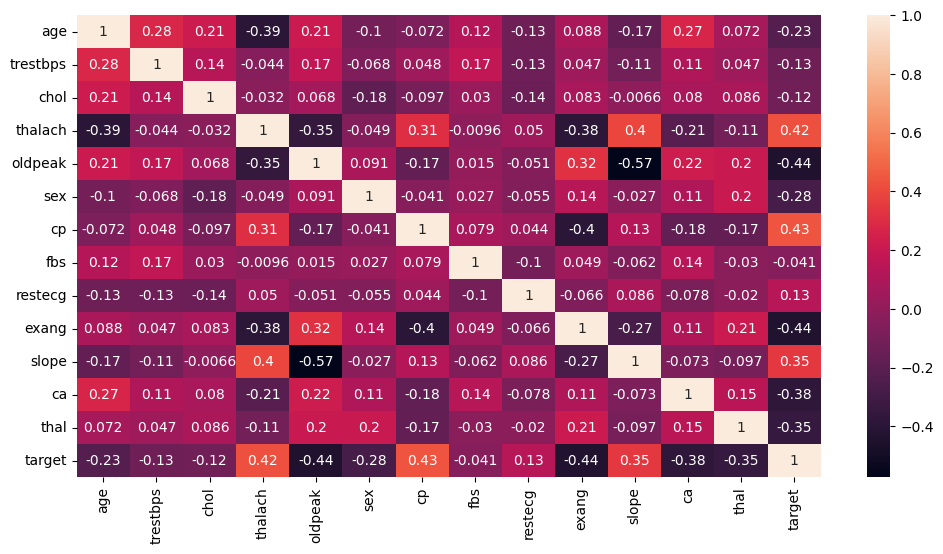

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.concat([final_df,target],axis=1).corr(), annot=True)
plt.show()



#### out of all the thalach column and chest pain column has the heighest correlation.

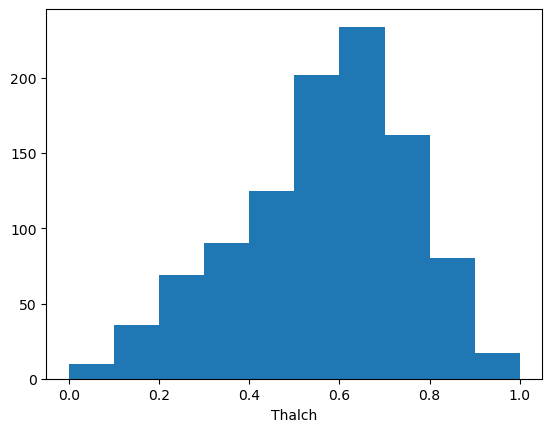

In [29]:
plt.hist(final_df['thalach'])
plt.xlabel("Thalch (scaled)")
plt.show()

In [18]:
def train_test(X,y):
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
  return X_train,X_test,y_train,y_test

In [20]:
X=final_df
y=target
X_train,X_test,y_train,y_test=train_test(X,y)


In [22]:
y_train

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


In [24]:
y_train = y_train.values.ravel()
y_train
# to drop the inedxex column by converting multi dimensional array into single dimensional array

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [26]:
#similarly for y_test
y_test = y_test.values.ravel()


logistic regression model

In [33]:

LR_model= LogisticRegression()
LR_model.fit(X_train,y_train)
LogR_y_prediction=LR_model.predict(X_test)

D:\ICT\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(LR_model.coef_)
print(LR_model.intercept_)

[[-0.0114371  -1.04716378 -1.73508726  2.14623507 -2.42752883 -1.56659257
   0.82813225 -0.10875513  0.28722974 -0.8849004   0.69100718 -0.81514776
  -1.111858  ]]
[3.96191643]


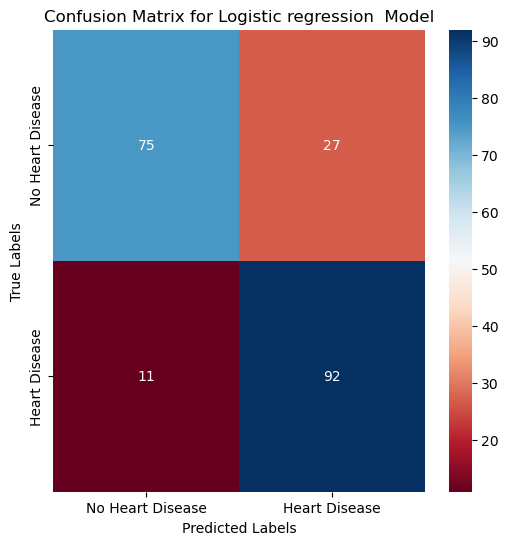


Accuracy LogisticRegressor:  81.46341463414633
precision: 0.8269588109930215
recall: 0.8146341463414634
f1_score: 0.8158422044254946


In [63]:

conf_mat=confusion_matrix(y_test,LogR_y_prediction)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="RdBu", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic regression  Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nAccuracy LogisticRegressor: ",accuracy_score(y_test,LogR_y_prediction)*100)
print('precision:',precision_score(LogR_y_prediction,y_test,average='weighted'))
print('recall:',recall_score(LogR_y_prediction,y_test,average='weighted'))
print('f1_score:',f1_score(LogR_y_prediction,y_test,average='weighted'))

### since target has best positive correlation with thalach and cp, I have tried to show the logistic regression performance if it were just those two varibales below

In [43]:
X2=final_df[['thalach','cp']]
y2=target.values.ravel()
X2_train,X2_test,y2_train,y2_test=train_test(X2,y2)

LR2_model= LogisticRegression()
LR2_model.fit(X2_train,y2_train)
LogR2_y_prediction=LR2_model.predict(X2_test)

print(LR2_model.coef_)
print(LR2_model.intercept_)

[[3.86269451 0.79659564]]
[-2.859724]


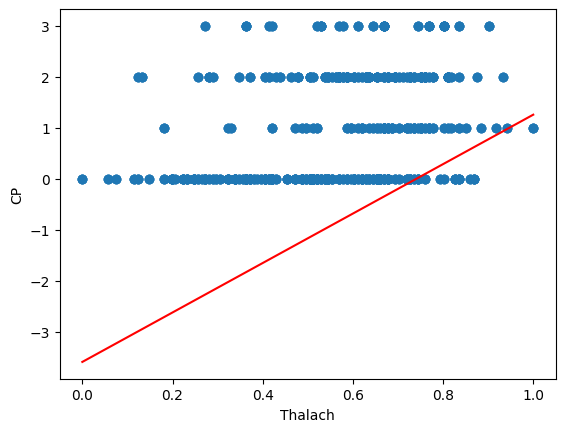

In [47]:
x_values= np.linspace(np.min(X2.iloc[:,0]),np.max(X2.iloc[:,0]),100)
y_values= (LR2_model.coef_[0][0]* x_values + LR2_model.intercept_)/LR2_model.coef_[0][1]

plt.scatter (X2.iloc[:,0],X2.iloc[:,1])
plt.xlabel("Thalach")
plt.ylabel("CP")
plt.plot(x_values,y_values,color='red')
plt.show()

#### The bizare distribution is simply because of the fact that CP is not a continuous data unlike thalach

In [48]:
final_df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,52,0.407895,0.351020,0.719008,0.222222,1,0,0,1,0,2,2,3
1,53,0.605263,0.314286,0.611570,0.688889,1,0,1,0,1,0,0,3
2,70,0.671053,0.195918,0.363636,0.577778,1,0,0,1,1,0,0,3
3,61,0.710526,0.314286,0.661157,0.000000,1,0,0,1,0,2,1,3
4,62,0.578947,0.685714,0.206612,0.422222,0,0,1,1,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,0.605263,0.387755,0.685950,0.000000,1,1,0,1,1,2,0,2
1021,60,0.407895,0.538776,0.495868,0.622222,1,0,0,0,1,1,1,3
1022,47,0.210526,0.608163,0.305785,0.222222,1,0,0,0,1,1,1,2
1023,50,0.210526,0.522449,0.644628,0.000000,0,0,0,0,0,2,0,2


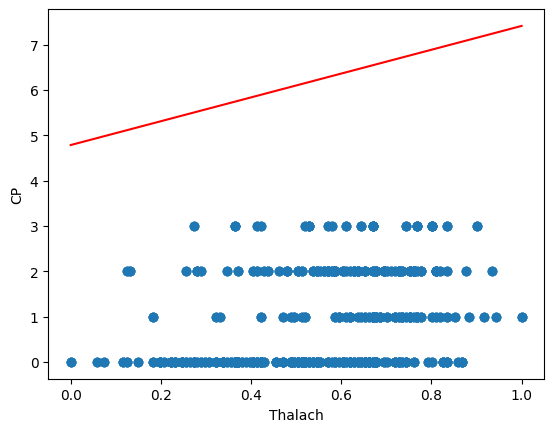

In [41]:
x_values = np.linspace(np.min(X.iloc[:, 3]), np.max(X.iloc[:, 3]), 100)  # Use .iloc for integer-based indexing
y_values = (LR_model.coef_[0][3] * x_values + LR_model.intercept_) / LR_model.coef_[0][6]

plt.scatter(X.iloc[:, 3], X.iloc[:, 6])  # Use .iloc for integer-based indexing
plt.xlabel("Thalach")
plt.ylabel("CP")
plt.plot(x_values, y_values, color='red')
plt.show()

# KNN Classifier

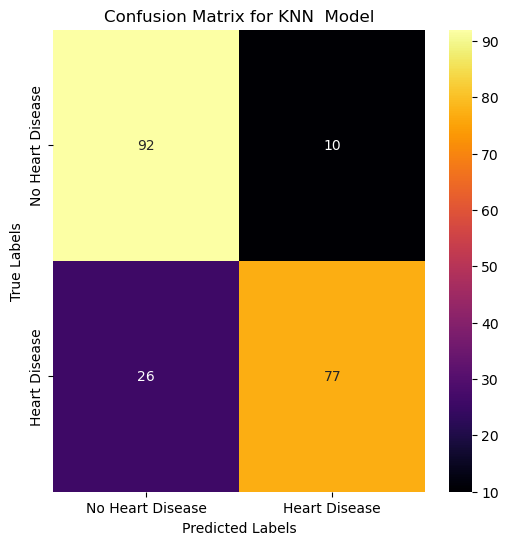


 ACCURACY KNN :  82.4390243902439
precision: 0.8364400365876874
recall: 0.824390243902439
f1_score: 0.8253985295833819


In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

conf_mat_knn=confusion_matrix(y_test,y_pred_Knn)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="inferno", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for KNN  Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("\n ACCURACY KNN : ",accuracy_score(y_test,y_pred_Knn)*100)


print('precision:',precision_score(y_pred_Knn,y_test,average='weighted'))
print('recall:',recall_score(y_pred_Knn,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_Knn,y_test,average='weighted'))

# NAIVE BAYES

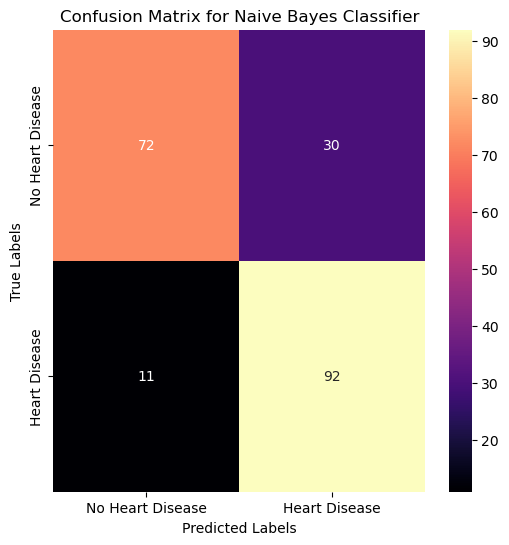


 ACCURACY Naive Bayes :  80.0
precision: 0.8173615077098803
recall: 0.8
f1_score: 0.801825825825826


In [59]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_NB = nb_classifier.predict(X_test)


conf_mat_NB=confusion_matrix(y_test,y_pred_NB)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_NB, annot=True, fmt="d", cmap="magma", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

nb_mae = mean_absolute_error(y_test, y_pred_NB)
nb_mse = mean_squared_error(y_test, y_pred_NB)
nb_rmse = np.sqrt(sc_knn_mse)
nb_r2 = r2_score(y_test, sc_knn_predictions)

# Print the metrics for KNN
print(f"KNN Mean Absolute Error (MAE): {sc_knn_mae}")
print(f"KNN Mean Squared Error (MSE): {sc_knn_mse}")
print(f"KNN Root Mean Squared Error (RMSE): {sc_knn_rmse}")


print("\n ACCURACY Naive Bayes : ",accuracy_score(y_test,y_pred_NB)*100)
print('precision:',precision_score(y_pred_NB,y_test,average='weighted'))
print('recall:',recall_score(y_pred_NB,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_NB,y_test,average='weighted'))

# Accuracy:

- KNN has the highest accuracy at 82.4%, followed by Logistic Regression (81.4%) and Naive Bayes (80%) .
- This proves that KNN is best suited for classifying on this dataset.
- 
# Precision:
- Precision measures how well the model avoids false positives.
- KNN has the highest precision 83.6%, indicating it is the best at ensuring positive predictions are correct.
- Logistic Regressor has a precision rate of 82.6% (pretty close to KNN) and Naive Bayes has the least of 81.7%.
- 
# Recall:
- Recall measures how well the model identifies all positive instances.
- KNN again leads at 82.4%, followed by Logistic Regression 81.4% and Naive Bayes 80%  .
  
# F1-Score:
- The F1-score balances precision and recall.
- KNN has the highest F1-score 82.5%, making it the most balanced model for this task.
- Logistic Regression 81.5% and Naive Bayes 80.1% .
